In [35]:
from recup_dataset import *
from caracteristiques import *
from lieux import *
from vehicules import *
from usagers import *
from merge_file import *
from random_forest import *
from boosting import *
from donnes_entrainement import *
from reseaux_de_neurones import *

In [2]:
import pandas as pd
import os
import chardet
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## <span style="color:blue"> Import des données d'entrainement' </span>

In [3]:
dfs = recuperer_train()
dfs.keys

C:\Users\vince\OneDrive\Documents\ESIEE_Paris\E4\Semestre_2\Apprentissage_automatique_2\projet\recup_dataset.py:39: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(chemin_complet, on_bad_lines='skip', encoding=encodage, sep =';')
C:\Users\vince\OneDrive\Documents\ESIEE_Paris\E4\Semestre_2\Apprentissage_automatique_2\projet\recup_dataset.py:39: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(chemin_complet, on_bad_lines='skip', encoding=encodage, sep =';')
C:\Users\vince\OneDrive\Documents\ESIEE_Paris\E4\Semestre_2\Apprentissage_automatique_2\projet\recup_dataset.py:39: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(chemin_complet, on_bad_lines='skip', encoding=encodage, sep =';')
C:\Users\vince\OneDrive\Documents\ESIEE_Paris\E4\Semestre_2\Apprentissage_automatique_2\projet\re

<function dict.keys>

In [4]:
df_c, df_l, df_v, df_u = merge_c_v_l_u(dfs)

In [5]:
df_carac = traitement_caracteristiques(df_c)
df_li = traitement_lieux(df_l)
df_ve = traitement_vehicules_2(df_v)
df_u = traitement_usagers_2(df_u)

C:\Users\vince\OneDrive\Documents\ESIEE_Paris\E4\Semestre_2\Apprentissage_automatique_2\projet\caracteristiques.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_progre['an'] = df_c['an'].apply(formatter_an)
C:\Users\vince\OneDrive\Documents\ESIEE_Paris\E4\Semestre_2\Apprentissage_automatique_2\projet\caracteristiques.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_progre['mois'] = df_c['mois'].fillna(-1)
C:\Users\vince\OneDrive\Documents\ESIEE_Paris\E4\Semestre_2\Apprentissage_automatique_2\p

## <span style="color:blue"> Import des données de test </span>

In [6]:
# Spécifiez le chemin du répertoire où se trouvent vos fichiers CSV
directory = "TEST/TEST/"

# Importez chaque fichier CSV
df_caracteristiques_test = pd.read_csv(directory + "CARACTERISTIQUES.csv")
df_lieux_test = pd.read_csv(directory + "LIEUX.csv")
df_usagers_test = pd.read_csv(directory + "USAGERS.csv")
df_vehicules_test = pd.read_csv(directory + "VEHICULES.csv")


C:\Users\vince\AppData\Local\Temp\ipykernel_43452\2259858906.py:5: DtypeWarning: Columns (4,10,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_caracteristiques_test = pd.read_csv(directory + "CARACTERISTIQUES.csv")
C:\Users\vince\AppData\Local\Temp\ipykernel_43452\2259858906.py:6: DtypeWarning: Columns (7,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lieux_test = pd.read_csv(directory + "LIEUX.csv")
C:\Users\vince\AppData\Local\Temp\ipykernel_43452\2259858906.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_usagers_test = pd.read_csv(directory + "USAGERS.csv")
C:\Users\vince\AppData\Local\Temp\ipykernel_43452\2259858906.py:8: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_vehicules_test = pd.read_csv(directory + "VEHICULES.csv")


In [7]:
ve_test = traitement_vehicules_2(df_vehicules_test)
c_test = traitement_caracteristiques(df_caracteristiques_test)
l_test = traitement_lieux(df_lieux_test)
u_test = traitement_usagers_2(df_usagers_test,True)

C:\Users\vince\OneDrive\Documents\ESIEE_Paris\E4\Semestre_2\Apprentissage_automatique_2\projet\caracteristiques.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_progre['an'] = df_c['an'].apply(formatter_an)
C:\Users\vince\OneDrive\Documents\ESIEE_Paris\E4\Semestre_2\Apprentissage_automatique_2\projet\caracteristiques.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_progre['mois'] = df_c['mois'].fillna(-1)
C:\Users\vince\OneDrive\Documents\ESIEE_Paris\E4\Semestre_2\Apprentissage_automatique_2\p

## <span style="color:green"> On merge tous les datasets entre eux sur Num_Acc en train </span>

In [8]:
df_final = tout_merge(df_u, df_ve, df_li, df_carac)

In [9]:
def annee(value):
    return int("20" + str(int(value)))

df_final['an'] = df_final['an'].apply(annee)
df_final['an']

#df_final['age'] = df_final.apply(lambda row: age_pers(row['an'], row['moyenne_an_nais']), axis=1)
df_final['age_moy_acc'] = df_final['an'] - df_final['moyenne_an_nais']
df_final = df_final.drop(columns=['an', 'moyenne_an_nais'])

## <span style="color:green"> On merge tous les datasets entre eux sur Num_Acc pour le test </span>

In [10]:
df_test = tout_merge(u_test, ve_test, l_test, c_test)

In [11]:
df_test['an'] = df_test['an'].apply(annee)
df_test['an']

#df_final['age'] = df_final.apply(lambda row: age_pers(row['an'], row['moyenne_an_nais']), axis=1)
df_test['age_moy_acc'] = df_test['an'] - df_test['moyenne_an_nais']
df_test = df_test.drop(columns=['an', 'moyenne_an_nais'])

In [12]:
Num_Acc_test = df_test['Num_Acc']
test_officiel = df_test.drop(columns=['Num_Acc'])

## <span style="color:purple"> On crée un petit jeu de données pour tester </span>

In [13]:
# utile pour Decision Classifier
df_aleatoire, X_train, y_train, X_test, y_test = data_train(df_final)

In [14]:
# utile pour les algos de deep learning

## <span style="color:purple"> Tester différents modèles </span>

### <span style="color:blue"> Decision classifier </span>

Text(0.5, 1.0, 'Target')

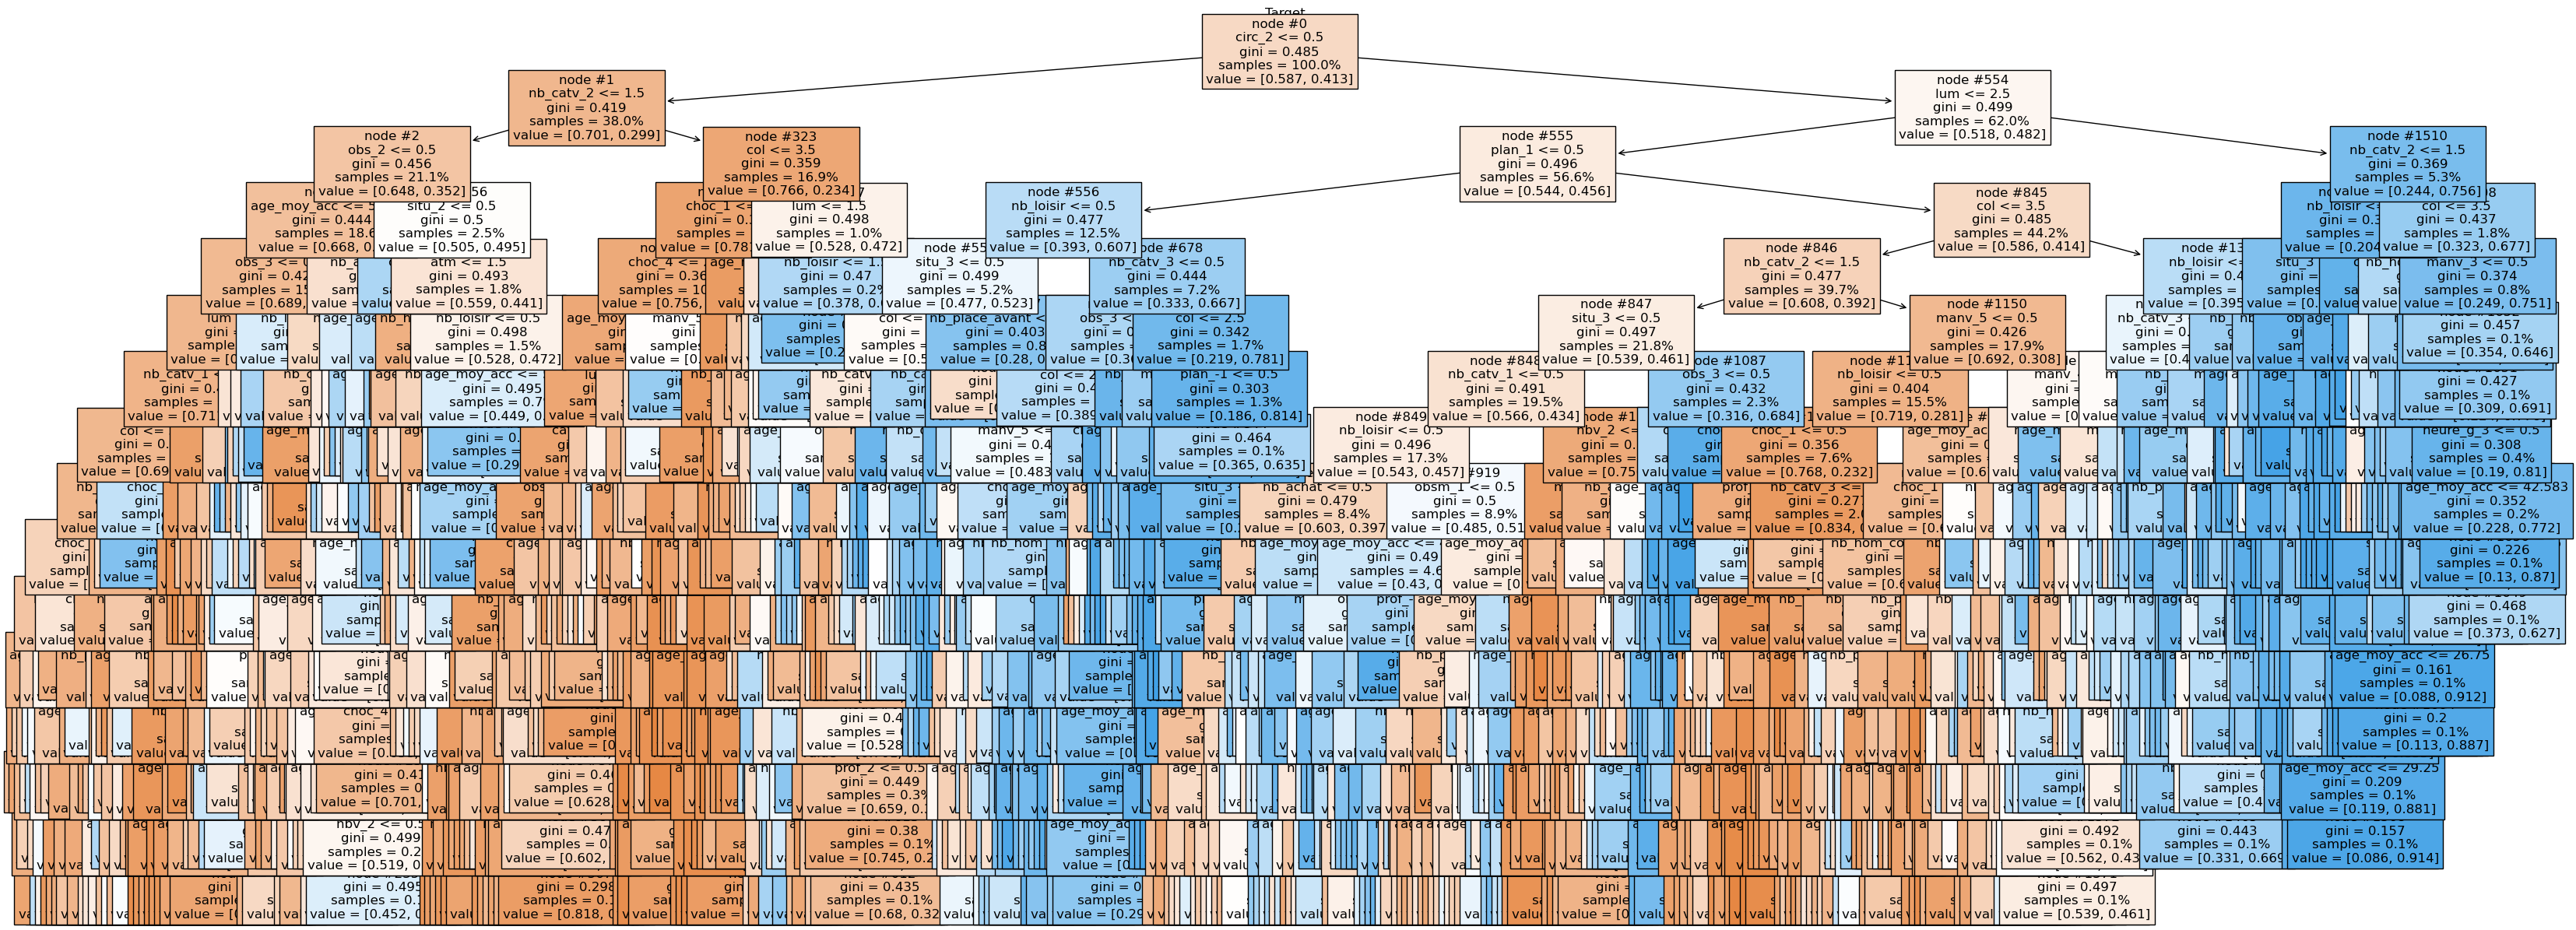

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_auc_score
clf = DecisionTreeClassifier(random_state=0,max_depth=15,min_samples_leaf=70, min_samples_split=20)
clf = clf.fit(X_train, y_train)
fig = plt.figure(figsize=(40,15))
_ = tree.plot_tree(clf,
                   feature_names=X_train.columns,
                   filled=True,proportion=True,
                   fontsize=12,
                   node_ids=True)
plt.title("Target")

In [16]:
probabilites = clf.predict_proba(X_test)
positive_probabilities = probabilites[:, 1]

# Calculer l'AUC
auc = roc_auc_score(y_test, positive_probabilities)
print("AUC:", auc)

AUC: 0.7250955815384617


### <span style="color:orange"> Trouver les meilleurs paramètres pour mon Decision classifier</span> 
#### <span style="color:pink"> Trouver les meilleurs paramètres pour mon Decision classifier avec GridSearch</span> 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir la grille des hyperparamètres à rechercher
param_grid = {
    'max_depth': [15],
    'min_samples_split': [20],
    'min_samples_leaf': [60, 70,90]
}

# Initialiser le GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                           param_grid=param_grid,
                           cv=5)  # Nombre de folds pour la validation croisée

# Exécuter la recherche sur la grille
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres:", grid_search.best_params_)

# Utiliser le modèle avec les meilleurs hyperparamètres
best_clf = grid_search.best_estimator_
best_clf

## <span style="color:brown">Test sur des vraies données de test</span>

In [ ]:
probabilites = clf.predict_proba(test_officiel)
proba_classe_1 = probabilites[:,1]
df_probabilites = pd.DataFrame(proba_classe_1, columns=['GRAVE'])
df_resultats_decision_classifier = pd.concat([Num_Acc_test , df_probabilites], axis=1)

In [ ]:
df_resultats_decision_classifier.to_csv('resultats_decision_classifier_v2_5.csv', index=False)

### <span style="color:blue">Random Forest</span>

In [17]:
X,y = data_X_y(df_final)

In [18]:
auc_scores_rf, rf_model =random_forest(X,y)
auc_scores_rf

[0.7557166926811414,
 0.7561735879478975,
 0.7587915780104899,
 0.7560060029918718,
 0.7553329683597418]

In [19]:
var_importante(rf_model,X)

circ_2         0.100583
col            0.068587
age_moy_acc    0.066083
nb_loisir      0.065711
nb_catv_2      0.051452
                 ...   
mois_3         0.000837
mois_4         0.000813
choc_5         0.000730
mois_2         0.000711
vosp_-1        0.000192
Length: 66, dtype: float64


### <span style="color:orange"> Trouver les meilleurs paramètres pour mon RandomForest</span> 
#### <span style="color:pink"> Trouver les meilleurs paramètres pour mon RandomForest avec GridSearch</span> 

In [36]:
params = meilleurs_params(X, y)
params

RandomForestClassifier(max_depth=30, min_samples_leaf=45, n_estimators=350,
                       random_state=42)

## <span style="color:brown">Test sur des vraies données de test</span>

In [22]:
probabilites = rf_model.predict_proba(test_officiel)
proba_classe_1 = probabilites[:,1]
df_probabilites = pd.DataFrame(proba_classe_1, columns=['GRAVE'])
df_resultats_random_forest = pd.concat([Num_Acc_test, df_probabilites], axis=1)
df_resultats_random_forest

,Num_Acc,GRAVE
0,201200049538,0.138256
1,201200004221,0.586636
2,201200002457,0.725786
3,201200009834,0.760383
4,201200025602,0.518182
...,...,...
63539,202200008772,0.384334
63540,202200026268,0.171689
63541,202200043480,0.478308
63542,202200022087,0.418115


In [ ]:
# Écrire le DataFrame dans un fichier CSV
df_resultats_random_forest.to_csv('resultats_random_forest_v2_6.csv', index=False)

## <span style="color:blue"> Boosting </span>

In [20]:
df_aleatoire, X_train, y_train, X_test, y_test = data_train(df_final)

In [21]:
model, auc = grad_boosting(X_train,X_test,y_train, y_test)
auc

'Aire sous la courbe ROC (AUC) :0.7605524350758397'

### <span style="color:orange"> Trouver les meilleurs paramètres pour mon boosting </span>
#### <span style="color:pink"> Trouver les meilleurs paramètres pour mon RandomForest avec RandomizedSearchCV</span> 

In [ ]:
best_params = meilleurs_params_boosting(X_train, y_train)
best_params

## <span style="color:brown">Test sur des vraies données de test</span>

In [23]:
probabilites = model.predict_proba(test_officiel)
proba_classe_1 = probabilites[:,1]
df_probabilites = pd.DataFrame(proba_classe_1, columns=['GRAVE'])
df_resultats_gradient_boosting = pd.concat([Num_Acc_test, df_probabilites], axis=1)
df_resultats_gradient_boosting


,Num_Acc,GRAVE
0,201200049538,0.114277
1,201200004221,0.689079
2,201200002457,0.940648
3,201200009834,0.764415
4,201200025602,0.399306
...,...,...
63539,202200008772,0.360738
63540,202200026268,0.124735
63541,202200043480,0.444088
63542,202200022087,0.459957


In [ ]:
df_resultats_gradient_boosting.to_csv('resultats_boosting_v2_7.csv', index=False)

## <span style="color:blue"> Réseau de Neurones </span>

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X,y = data_X_y(df_final)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train_scaled,X_test_scaled = transfo_data(X_train,X_test)

### <span style="color:orange"> Réseau de neuronnes fully connected v1</span>

In [28]:
model = fully_connected(X_train_scaled,y_train)

C:\Apps\Anaconda\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
14166/14166 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.6981 - loss: 0.5846 - val_accuracy: 0.7075 - val_loss: 0.5750
Epoch 2/5
14166/14166 ━━━━━━━━━━━━━━━━━━━━ 14s 993us/step - accuracy: 0.7107 - loss: 0.5700 - val_accuracy: 0.7089 - val_loss: 0.5707
Epoch 3/5
14166/14166 ━━━━━━━━━━━━━━━━━━━━ 14s 983us/step - accuracy: 0.7151 - loss: 0.5650 - val_accuracy: 0.7112 - val_loss: 0.5698
Epoch 4/5
14166/14166 ━━━━━━━━━━━━━━━━━━━━ 14s 988us/step - accuracy: 0.7140 - loss: 0.5648 - val_accuracy: 0.7098 - val_loss: 0.5693
Epoch 5/5
14166/14166 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.7151 - loss: 0.5640 - val_accuracy: 0.7116 - val_loss: 0.5688


In [29]:
y_pred_proba = model.predict(X_test_scaled)

auc = roc_auc_score(y_test, y_pred_proba)
print('Aire sous la courbe ROC (AUC) :', auc)

4427/4427 ━━━━━━━━━━━━━━━━━━━━ 3s 741us/step
Aire sous la courbe ROC (AUC) : 0.7617228212775933


## <span style="color:brown">Test sur des vraies données de test</span>

In [ ]:
X_test_scaled = transfo_data_test(test_officiel)

In [ ]:
y_pred_proba = model.predict(X_test_scaled)
df_probabilites = pd.DataFrame(y_pred_proba, columns=['GRAVE'])
df_resultats_reseau_neurones_v1 = pd.concat([Num_Acc_test, df_probabilites], axis=1)

In [ ]:
df_resultats_reseau_neurones_v1.to_csv('resultats_reseau_de_neurones_v2_7.csv', index=False)

### <span style="color:orange"> Réseau de neuronnes fully connected v2</span>

In [ ]:
X,y = data_X_y(df_final)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled,X_test_scaled = transfo_data(X_train,X_test)

In [ ]:
model2 = fully_connected_v2(X_train_scaled,y_train)

In [ ]:
# Prédire les probabilités sur l'ensemble de test
y_pred_proba = model2.predict(X_test_scaled)

# Calculer l'AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('Aire sous la courbe ROC (AUC) :', auc)

## <span style="color:brown">Test sur des vraies données de test</span>

In [ ]:
X_test_scaled = transfo_data_test(test_officiel)
y_pred_proba = model2.predict(X_test_scaled)
df_probabilites = pd.DataFrame(y_pred_proba, columns=['GRAVE'])
df_resultats_reseau_neurones_v2 = pd.concat([Num_Acc_test, df_probabilites], axis=1)

In [ ]:
df_resultats_reseau_neurones_v2.to_csv('resultats_reseau_de_neurones_v2_v2_8.csv', index=False)

### <span style="color:orange"> Réseau de neuronnes fully connected v3 avec régularisation</span>

In [30]:
X,y = data_X_y(df_final)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train_scaled,X_test_scaled = transfo_data(X_train,X_test)

In [32]:
model3 = reseau_regularisation(X_train_scaled,y_train)

Epoch 1/5


C:\Apps\Anaconda\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14166/14166 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.6968 - loss: 0.6425 - val_accuracy: 0.7048 - val_loss: 0.5866
Epoch 2/5
14166/14166 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.7047 - loss: 0.5859 - val_accuracy: 0.7054 - val_loss: 0.5835
Epoch 3/5
14166/14166 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.7077 - loss: 0.5831 - val_accuracy: 0.7067 - val_loss: 0.5821
Epoch 4/5
14166/14166 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.7086 - loss: 0.5810 - val_accuracy: 0.7062 - val_loss: 0.5828
Epoch 5/5
14166/14166 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.7065 - loss: 0.5829 - val_accuracy: 0.7060 - val_loss: 0.5827


In [33]:
# Prédire les probabilités sur l'ensemble de test
y_pred_proba = model3.predict(X_test_scaled)

# Calculer l'AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('Aire sous la courbe ROC (AUC) :', auc)

4427/4427 ━━━━━━━━━━━━━━━━━━━━ 3s 754us/step
Aire sous la courbe ROC (AUC) : 0.7538947033646815


In [ ]:
X_test_scaled = transfo_data_test(test_officiel)
y_pred_proba = model3.predict(X_test_scaled)
df_probabilites = pd.DataFrame(y_pred_proba, columns=['GRAVE'])
df_resultats_reseau_neurones_v2_reg = pd.concat([Num_Acc_test, df_probabilites], axis=1)
df_resultats_reseau_neurones_v2_reg

In [ ]:
# Écrire le DataFrame dans un fichier CSV
df_resultats_reseau_neurones_v2_reg.to_csv('resultats_reseau_de_neurones_v2_regularisation_9.csv', index=False)

### <span style="color:orange"> ## Reseau de neurones RNN </span>

In [ ]:
X,y = data_X_y(df_final)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled,X_test_scaled = transfo_data(X_train,X_test)

In [ ]:
model4 = reseau_RNN(X_train_scaled, y_train)

In [ ]:
y_pred = model4.predict(X_test_scaled)
# Calculer l'AUC
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

## <span style="color:brown">Test sur des vraies données de test</span>

In [ ]:
X_test_scaled = transfo_data_test(test_officiel)
y_pred_proba = model4.predict(X_test_scaled)
df_probabilites = pd.DataFrame(y_pred_proba, columns=['GRAVE'])
df_resultats_reseau_neurones_v2_RNN = pd.concat([Num_Acc_test, df_probabilites], axis=1)
df_resultats_reseau_neurones_v2_RNN

In [ ]:
# Écrire le DataFrame dans un fichier CSV
df_resultats_reseau_neurones_v2_RNN.to_csv('resultats_reseau_de_neurones_v2_RNN_10.csv', index=False)